# 9. Houghova transformácia

In [21]:
import numpy as np
from skimage import filters, transform, feature, io, data
import matplotlib.pyplot as plt
from IPython.display import display
from skimage.color import rgb2gray
from skimage.draw import circle_perimeter
from skimage.transform import hough_line, probabilistic_hough_line, hough_circle, hough_circle_peaks

In [22]:
plt.rcParams['text.color'] = 'w'
plt.rcParams['xtick.color'] = 'w'
plt.rcParams['ytick.color'] = 'w'
plt.rcParams['axes.labelcolor'] = 'w'
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 18}

plt.rc('font', **font)

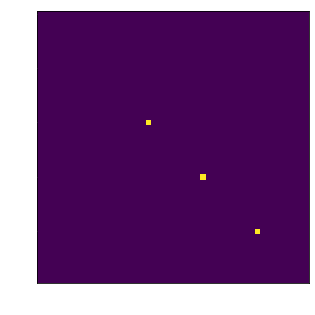

In [23]:
I = np.zeros((50,50))
I[20,20]=1
I[30,30]=1
I[40,40]=1
#I[4,14]=1

plt.figure(figsize=(5,5))
plt.imshow(I)

## rho = x * cos(theta) + y * sin(theta)

In [24]:
thetas = np.arange(0, np.pi, 0.02)
display("Theta has: "+ str(thetas.size)+" values.")

'Theta has: 158 values.'

In [25]:
x,y = np.where(I==1)

plt.figure(figsize=(15,10))
rho_stack = []

for i in range(0,x.size):
    rhos = x[i] *np.cos(thetas) + y[i]* np.sin(thetas)
    rho_stack.append(rhos)
    plt.plot(np.rad2deg(thetas), rhos)
plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta - uhol v stupnoch")
plt.ylabel("Rhos - posunutie ak chcem trafit hranu")

Text(0, 0.5, 'Rhos - posunutie ak chcem trafit hranu')

In [26]:
rho_stack = np.array(rho_stack)

r1 = np.abs(rho_stack[0,:]-rho_stack[1,:])
r2 = np.abs(rho_stack[0,:]-rho_stack[2,:])
r3 = np.abs(rho_stack[1,:]-rho_stack[2,:])

min_dif = np.where((r1+r2+r3) == np.min(r1+r2+r3) )

rho_winner = rho_stack[0, min_dif]
theta_winner = thetas[min_dif]

display("We found fitting  line with params Rho: {} pixels and Theta {} degrees".format(rho_winner,np.rad2deg(theta_winner)))


'We found fitting  line with params Rho: [[-0.10763581]] pixels and Theta [135.21803965] degrees'

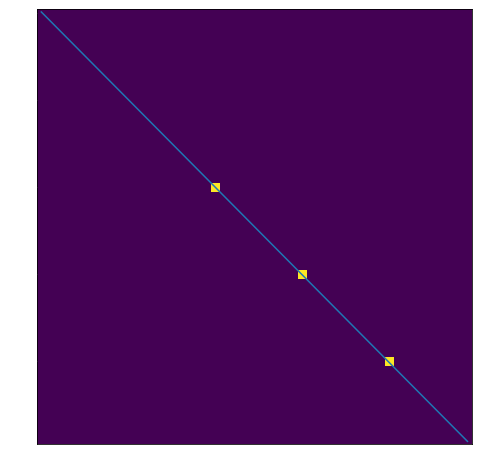

In [27]:
line_x = np.array([[0, I.shape[1]-1]])
line_y = (-np.cos(theta_winner)/np.sin(theta_winner))*line_x + rho_winner/np.sin(theta_winner)
plt.figure(figsize=(8,8))
plt.imshow(I)
plt.plot(line_x.ravel(),line_y.ravel())

In [28]:
accumulator = []
for i in range(0,x.size):
    rhos = x[i] *np.cos(thetas) + y[i]* np.sin(thetas)
    accumulator.append(rhos)
accumulator = np.array(rho_stack)

D = np.sqrt(I.shape[0]**2+ I.shape[1]**2) #uhlopriecka
rho_range =np.arange(-I.shape[1],D,1)   # ake realne hodnoty moze naberat priamka v obraze?

In [29]:
hough_space = np.zeros((rho_range.size, thetas.size))

### Akumulacia do disktretizovanej matice (obrazka *)

In [30]:
for i in range(0,thetas.size):
    rho_vals = accumulator[:,i]
    y_hist, x_hist = np.histogram(rho_vals, rho_range)

    hough_space[:hough_space.shape[0]-1, i] = np.flipud(y_hist)
plt.figure(figsize=(10,10))
plt.imshow(hough_space)

plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta - premapovane do disk. priestoru 158")
plt.ylabel("Rhos - premapovane do disk. priestoru 121")

Text(0, 0.5, 'Rhos - premapovane do disk. priestoru 121')

In [31]:
max_hough = np.max(hough_space)
x, y = np.where(hough_space == max_hough)
theta_winner= thetas[y[1]]
rho_winner = rho_range[rho_range.size - x[1]]

display("We found fitting  line with params Rho: {} pixels and Theta {} degrees".format([rho_winner],np.rad2deg(theta_winner)))

'We found fitting  line with params Rho: [1.0] pixels and Theta 135.2180396508743 degrees'

In [32]:
plt.figure(figsize=(10,10))
I = np.zeros((100, 100))
I[25:75,25:75] = 255
plt.subplot(121)
plt.imshow(I)
I = filters.roberts(I)
plt.subplot(122)
plt.imshow(I)

In [33]:
width, height = I.shape
D = (height**2 + width**2)**(1/2)

thetas = np.arange(0,np.pi,0.01)
rhos = np.arange(-width,D,1)

hough_space = np.zeros((rhos.size, thetas.size))

In [34]:
x, y = np.where(I > 0)

In [35]:
accumulator = np.zeros((x.size, thetas.size))

cos_vals = np.matmul(np.expand_dims(np.arange(0,width,1),axis=0).T,
                     np.expand_dims(np.cos(thetas),axis=0))

sin_vals = np.matmul(np.expand_dims(np.arange(0,height,1),axis=0).T,
                     np.expand_dims(np.sin(thetas),axis=0))

In [36]:
x_match = cos_vals[x,:]
y_match = sin_vals[y,:]

accumulator[:,:] =  x_match + y_match

for i in range(0,thetas.size):
    rho_vals = accumulator[:,i]
    y_hist, x_hist = np.histogram(rho_vals, rhos)
    hough_space[1:,i] = np.flipud(y_hist)

In [37]:
plt.figure(figsize=(25,15))
plt.subplot(211)
plt.imshow(hough_space)
plt.title("Houghov priestor parametrov Rho a Theta")
plt.xlabel("Theta")
plt.ylabel("Rhos")
plt.subplot(212)
plt.imshow(hough_space> np.percentile(hough_space,99))
plt.title("Houghov priestor parametrov Rho a Theta 99th percentile")
plt.xlabel("Theta")
plt.ylabel("Rhos")

# D.U. Dokoncit cvicenie  64 - 68

Text(0, 0.5, 'Rhos')

In [38]:
hough_space_copy = np.copy(hough_space)
thresh = 0.7 * np.max(hough_space_copy)

supp = 5
continue_search = True
peaks = []

hough_x_size, hough_y_size = hough_space_copy.shape

while continue_search:
    value = np.max(hough_space_copy)

    max_array = np.where(hough_space_copy == value)
    x, y= max_array[0][0], max_array[1][0]

    if value > thresh:
        peaks.append([round(-1*(x - D)), ((y + 1) * 0.01) if y != 0 else 0 ])
        x_start, y_start = x - supp if x - supp > 0 else 0, y - supp if y - supp > 0 else 0
        x_end, y_end = x + supp if x + supp < hough_x_size else hough_x_size, y + supp if y + supp < hough_y_size else hough_y_size
        hough_space_copy[x_start:x_end, y_start:y_end] = np.zeros((x_end - x_start, y_end - y_start))
    else:
        continue_search = False

peaks = np.array(peaks)
print(peaks)

[[ 74.     0.  ]
 [ 74.     1.57]
 [ 24.     0.  ]
 [ 24.     1.57]
 [-24.     3.14]
 [-74.     3.14]]


In [39]:
plt.imshow(I)
I_copy = np.copy(I)

for rho, theta in peaks[1:,:]:
    if theta == 0:
        continue
    rho = int(rho)
    print(rho, theta)
    if theta == 0 or theta >= 3.13:
        I_copy[:, rho] = 120
    else:
        line_x = np.array(range(0, I_copy.shape[1]))
        line_y = (-np.cos(theta) / np.sin(theta)) * line_x + (rho / np.sin(theta))
        for x, y in zip(line_x, line_y):
            I_copy[int(y)][x] = 120


plt.imshow(I_copy)

74 1.57
24 1.57
-24 3.14
-74 3.14


<ipython-input-40-f3ceac5fcf7b>:14: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(T, R, H, cmap = "jet")


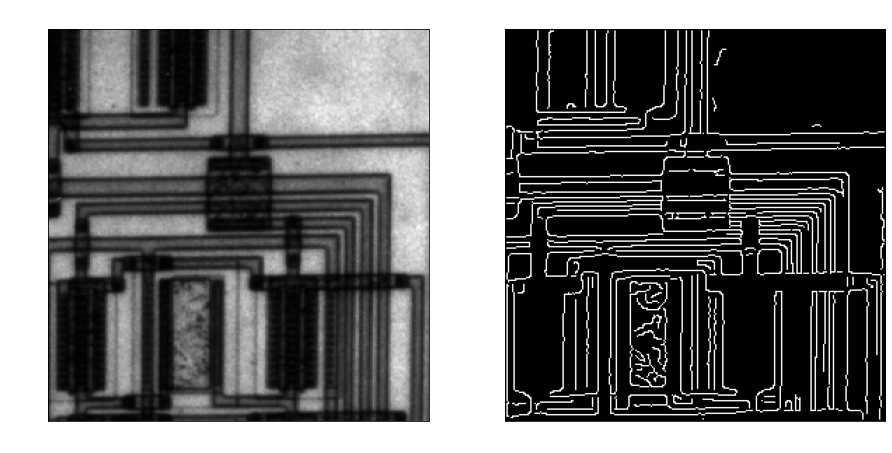

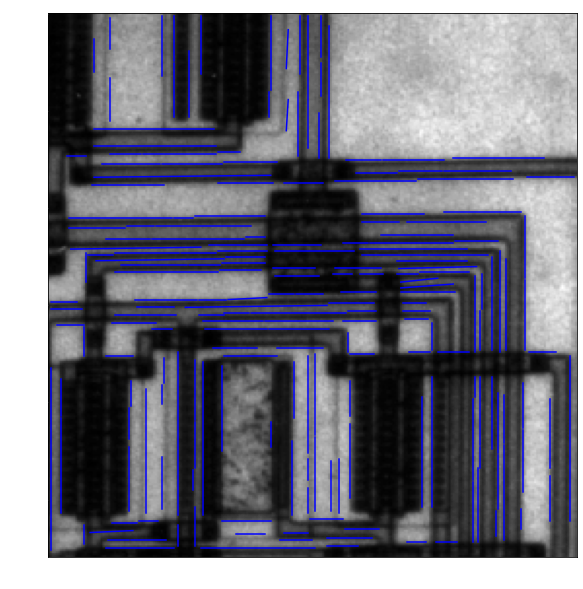

In [40]:
I = plt.imread("./imgs/circuit.tif")

plt.figure(figsize=(15, 10))
plt.subplot(121)
plt.imshow(I, cmap = "gray")
plt.title("Povodny obrazok")
BW = feature.canny(I, 1.3)
plt.subplot(122)
plt.imshow(BW, cmap = "gray")
plt.title("Detekovane hrany")

H, T, R = hough_line(BW)
plt.figure(figsize=(15, 10))
plt.pcolor(T, R, H, cmap = "jet")
plt.xlabel("theta")
plt.ylabel("rho")
plt.title("Houghov priestor")

plt.figure(figsize=(10,10))
lines = probabilistic_hough_line(BW, threshold= 60, line_length= 10, line_gap= 1)
plt.imshow(I, cmap='gray')
for p0,p1 in lines:
    plt.plot((p0[0], p1[0]), (p0[1], p1[1]), 'b-')

<ipython-input-44-e0eb31223ab2>:1: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  I = rgb2gray(data.coins())


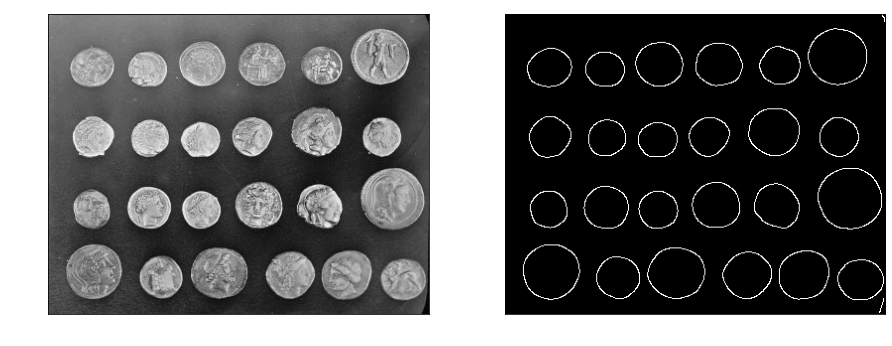

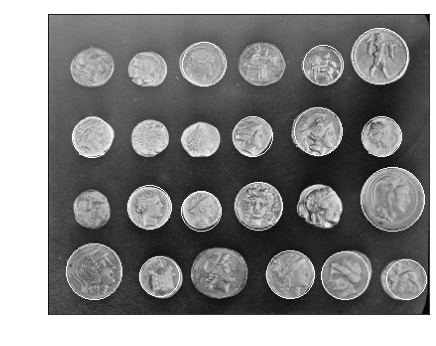

In [44]:
I = rgb2gray(data.coins())
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.imshow(I, cmap='gray')

middle_coor = []
BW = feature.canny(I, sigma=3, low_threshold=10, high_threshold=60)
h, theta, d = hough_line(BW)

hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(BW, hough_radii)

accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=23)

for center_y, center_x, radius in zip(cy, cx, radii):
    already_there = False
    circle_y, circle_x = circle_perimeter(center_y, center_x, radius, shape=I.shape)

    for x, y in middle_coor:
        if ((x - center_x)**2 + (y - center_y)**2)**(1/2) < 10:
            already_there = True

    if not already_there:
        I[circle_y, circle_x] = (np.max(I))
        middle_coor.append ([center_x, center_y])


plt.subplot(122)
plt.imshow(BW, cmap='gray')
plt.figure(figsize=(15,10))
plt.subplot(122)
plt.imshow(I, cmap='gray')